In [139]:
# Import the required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [140]:
# Read the data and display

diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [141]:
# Shape of the dataset 

print(diabetesDF.shape)

(768, 9)


In [142]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [143]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [144]:
# Return the number of missing values

diabetesDF.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [145]:
# Number of outcomes

diabetesDF.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

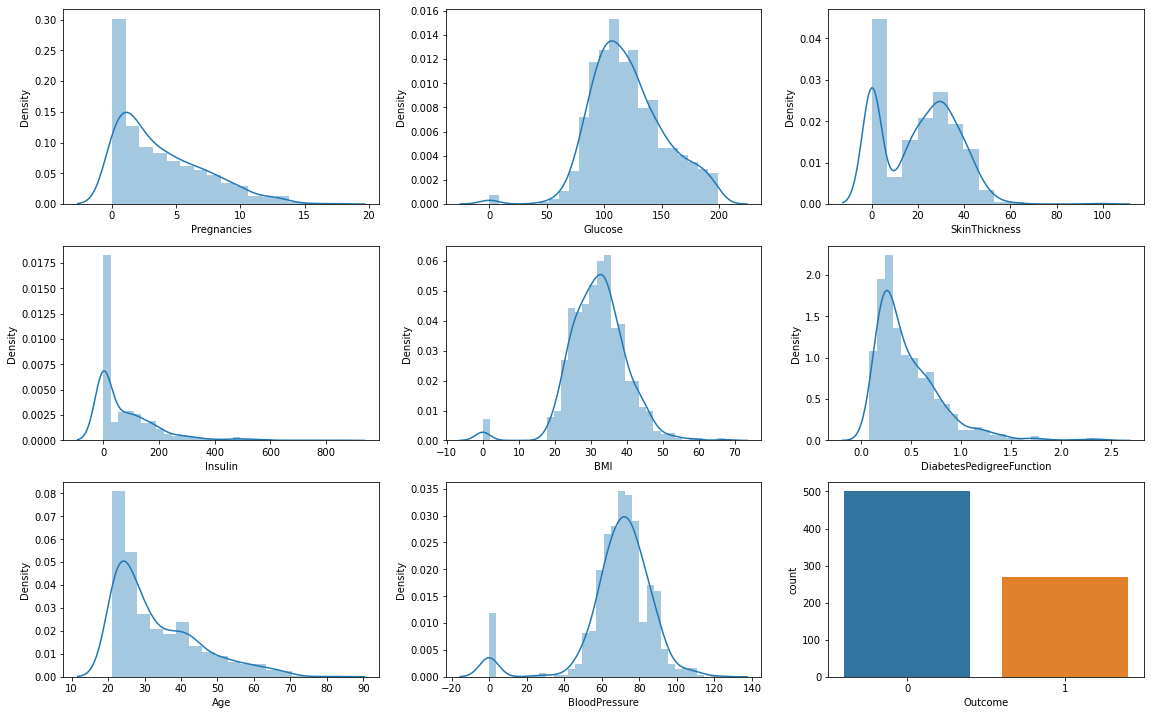

In [146]:
# Visualising data 

# DistPlots
plt.figure(figsize = (16, 10))

plt.subplot(3, 3, 1)
sns.distplot(diabetesDF.Pregnancies)

plt.subplot(3, 3, 2)
sns.distplot(diabetesDF.Glucose)

plt.subplot(3, 3, 8)
sns.distplot(diabetesDF.BloodPressure)

plt.subplot(3, 3, 3)
sns.distplot(diabetesDF.SkinThickness)

plt.subplot(3, 3, 4)
sns.distplot(diabetesDF.Insulin)

plt.subplot(3, 3, 5)
sns.distplot(diabetesDF.BMI)

plt.subplot(3, 3, 6)
sns.distplot(diabetesDF.DiabetesPedigreeFunction)

plt.subplot(3, 3, 7)
sns.distplot(diabetesDF.Age)

plt.subplot(3, 3, 9)
sns.countplot(diabetesDF.Outcome)

plt.tight_layout()

We can infer that even though we do not have NaN values, there are a lot of wrong values present in our data, like:
- Glucose Level cannot be above 150 or below 70
- Blood Pressure cannot be below 55
- Skin thickness cannot be 0
- BMI index cannot be 0

In [147]:
# Data Cleaning 

df_improv = diabetesDF.copy()

In [148]:
# Taking mean of valid data in the dataset

mean_Glucose = diabetesDF.loc[(diabetesDF.Glucose > 70) & (diabetesDF.Glucose < 150), 'Glucose'].mean()

mean_BloodPressure = diabetesDF.loc[diabetesDF.BloodPressure > 55, 'BloodPressure'].mean()

mean_SkinThickness = diabetesDF.loc[diabetesDF.SkinThickness != 0, 'SkinThickness'].mean()

mean_Insulin = diabetesDF.loc[(diabetesDF.Insulin > 35) & (diabetesDF.Insulin < 150), 'Insulin'].mean()

mean_BMI = diabetesDF.loc[diabetesDF.BMI != 0, 'BMI'].mean()

In [149]:
df_improv.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [150]:
df_improv.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [151]:
# Replacing all the wrong values

# df_improv.loc[(diabetesDF.Glucose < 70) | (df_improv.Glucose > 150), 'Glucose'] = np.ceil(np.random.rand() + mean_Glucose)

df_improv.Glucose.replace(0, mean_Glucose, inplace = True)

# df_improv.loc[df_improv.BloodPressure < 55, 'BloodPressure'] = np.ceil(np.random.rand() + mean_BloodPressure)

df_improv.BloodPressure.replace(0, np.ceil(np.random.rand() + mean_BloodPressure), inplace = True)

df_improv.SkinThickness.replace(0, np.ceil(np.random.rand() + mean_SkinThickness), inplace = True)

# df_improv.Insulin.replace(0, np.ceil(np.random.rand() + mean_Insulin), inplace = True)

df_improv.BMI.replace(0, np.ceil(np.random.rand() + mean_BMI), inplace = True)


df_improv.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,30,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [152]:
df_improv.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.618438,72.569010,29.403646,79.799479,32.479557,0.471876,33.240885,0.348958
std,3.369578,30.447665,12.119588,8.799436,115.244002,6.877597,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,73.000000,30.000000,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [153]:
# Total 768 patients record
# Using 650 data for training
# Using 100 data for testing
# Using 18 data for validation

dfTrain = df_improv[:650]
dfTest = df_improv[650:750]
dfCheck = df_improv[750:]

In [154]:
# Separating label and features and converting to numpy array to feed into our model
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

In [155]:
# Normalize the data 
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [156]:
# models target t as sigmoid(w0 + w1*x1 + w2*x2 + ... + wd*xd)
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData,trainLabel)
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

accuracy =  77.0 %


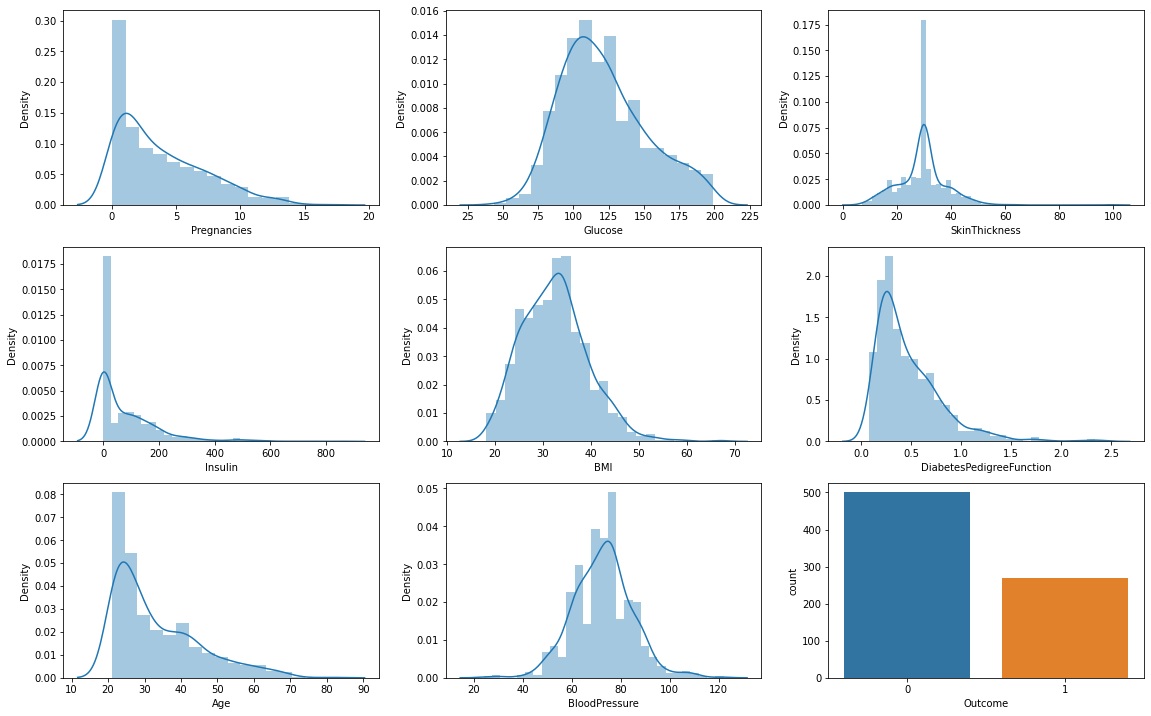

In [157]:
# Visualising data 

# DistPlots
plt.figure(figsize = (16, 10))

plt.subplot(3, 3, 1)
sns.distplot(df_improv.Pregnancies)

plt.subplot(3, 3, 2)
sns.distplot(df_improv.Glucose)

plt.subplot(3, 3, 8)
sns.distplot(df_improv.BloodPressure)

plt.subplot(3, 3, 3)
sns.distplot(df_improv.SkinThickness)

plt.subplot(3, 3, 4)
sns.distplot(df_improv.Insulin)

plt.subplot(3, 3, 5)
sns.distplot(df_improv.BMI)

plt.subplot(3, 3, 6)
sns.distplot(df_improv.DiabetesPedigreeFunction)

plt.subplot(3, 3, 7)
sns.distplot(df_improv.Age)

plt.subplot(3, 3, 9)
sns.countplot(df_improv.Outcome)

plt.tight_layout()

In [158]:
# predict values using training data

predict_train = diabetesCheck.predict(trainData)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(trainLabel,predict_train)))
print()

Accuracy: 0.7800



In [159]:
# predict values using testing data

predict_train = diabetesCheck.predict(testData)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(testLabel,predict_train)))
print()

Accuracy: 0.7700



In [160]:
# Confusion Matrix

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(testLabel,predict_train)))
print("")

Confusion Matrix
[[55  8]
 [15 22]]



In [161]:
print("Classification Report")
print("{0}".format(metrics.classification_report(testLabel,predict_train)))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        63
           1       0.73      0.59      0.66        37

    accuracy                           0.77       100
   macro avg       0.76      0.73      0.74       100
weighted avg       0.77      0.77      0.76       100

